In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [105]:
suv=pd.read_csv('SocialNetworkAds.csv')
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [106]:
car=pd.DataFrame(suv)

In [107]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [108]:
car.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

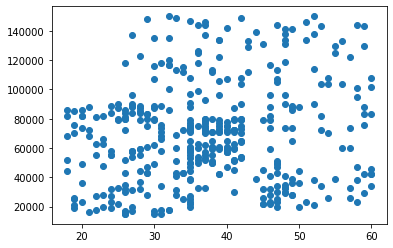

In [109]:
plt.scatter(car['Age'],car['EstimatedSalary'])
plt.show()

In [110]:
car.shape

(400, 5)

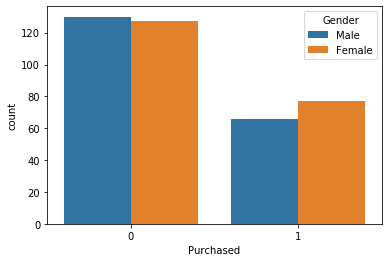

In [111]:
sns.countplot(x='Purchased',hue='Gender',data=car)

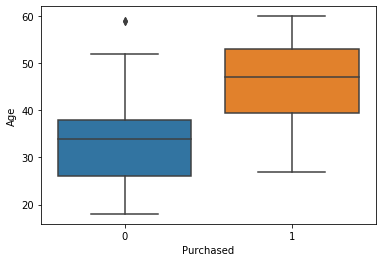

In [112]:
sns.boxplot(x='Purchased',y='Age',data=car)

In [113]:
car.drop(['User ID'],axis=1,inplace=True)

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car['Gender']=le.fit_transform(car['Gender'])

In [115]:
car.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0


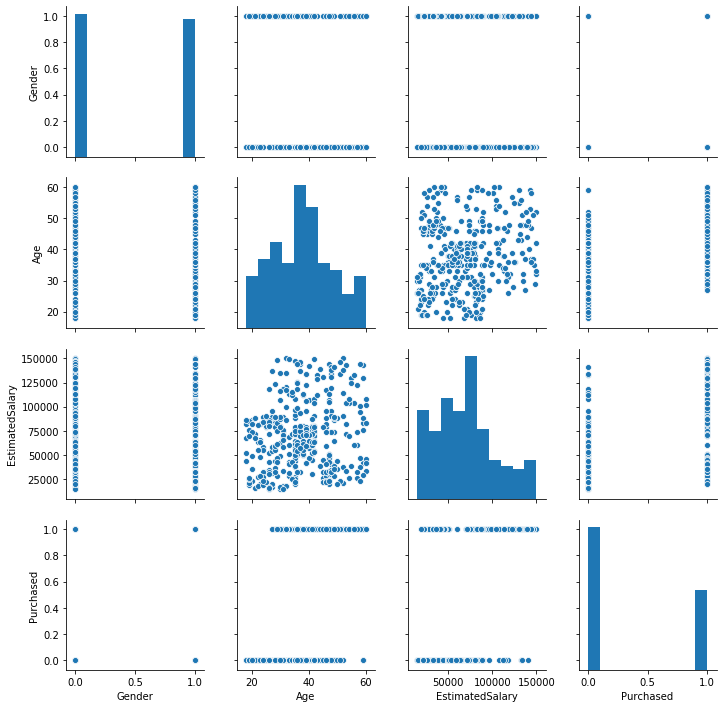

In [116]:
sns.pairplot(car)

In [117]:
car.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [118]:
from scipy.stats import boxcox
car['EstimatedSalary']=boxcox(car['EstimatedSalary'],0)

In [119]:
x=car.iloc[:,:-1]
y=car.iloc[:,-1]

In [120]:
def random(alg,x,y):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(accuracy,'at',final_r)

In [121]:
def metrics(y_test,pred):
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [122]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge

In [123]:
import warnings
warnings.filterwarnings('ignore')
lr=LogisticRegression()
random(lr,x,y)

0.8409090909090909 at 77


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=77)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
metrics(y_test,pred)

0.8787878787878788
[[84  2]
 [14 32]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        86
           1       0.94      0.70      0.80        46

    accuracy                           0.88       132
   macro avg       0.90      0.84      0.86       132
weighted avg       0.89      0.88      0.87       132



In [125]:
lrscore=cross_val_score(lr,x,y,cv=5)
print(lrscore.mean())
print(lrscore.std())

0.8046616658852945
0.04168463119430658


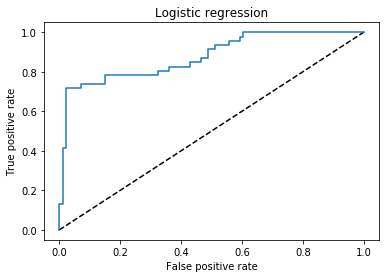

In [126]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Logistic regression")
plt.show()

In [127]:
auc_score=roc_auc_score(y_test,pred)
auc_score

0.8361981799797775

In [128]:
ls=Lasso()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
grd=GridSearchCV(estimator=ls,param_grid=alphavalue)
grd.fit(x_train,y_train)
print(grd.best_score_)
print(grd.best_params_)

0.3410029167331786
{'alpha': 0.01}


In [129]:
l=Lasso(0.01)
l.fit(x_train,y_train)
l.score(x_train,y_train)

0.38742092130728734

In [130]:
r=Ridge()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
grd=GridSearchCV(estimator=r,param_grid=alphavalue)
grd.fit(x_train,y_train)
print(grd.best_score_)
print(grd.best_params_)

0.3406166311627292
{'alpha': 1}


In [131]:
rd=Ridge(1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.390425242862963

In [132]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc,x,y)

0.8712121212121212 at 47


In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=57)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
metrics(y_test,pred)

0.8863636363636364
[[76  5]
 [10 41]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        81
           1       0.89      0.80      0.85        51

    accuracy                           0.89       132
   macro avg       0.89      0.87      0.88       132
weighted avg       0.89      0.89      0.89       132



In [134]:
dtcscore=cross_val_score(dtc,x,y,cv=5)
print(dtcscore)
print(dtcscore.mean())
print(dtcscore.std())

[0.74074074 0.90123457 0.85       0.78481013 0.73417722]
0.8021925300828254
0.06449718266698466


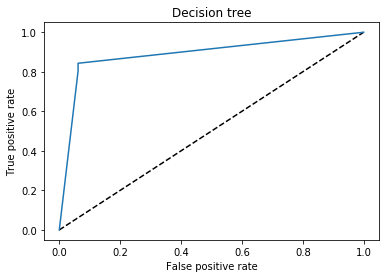

In [135]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Decision tree")
plt.show()

In [136]:
auc_score=roc_auc_score(y_test,pred)
auc_score

0.8710965867828613

In [137]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb,x,y)

0.8333333333333334 at 76


In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=76)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
metrics(y_test,pred)

0.9090909090909091
[[86  2]
 [10 34]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.93        88
           1       0.94      0.77      0.85        44

    accuracy                           0.91       132
   macro avg       0.92      0.88      0.89       132
weighted avg       0.91      0.91      0.91       132



In [139]:
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.77777778 0.88888889 0.8875     0.7721519  0.84810127]
0.8348839662447256 0.05110010712600308


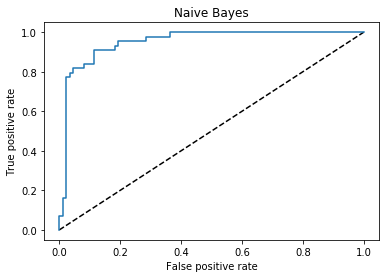

In [140]:
y_pred_prob=gnb.predict_proba(x_test)[:,-1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Naive Bayes')
plt.show()

In [141]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score

0.875

In [142]:
from sklearn.svm import SVC
svm=SVC()
parameters = {'kernel':["rbf","linear"],'C':[1,10,100]}
grids=GridSearchCV(svm,parameters)
grids.fit(x_train,y_train)
print(grids.best_score_)
print(grids.best_params_)

0.8283582089552238
{'C': 1, 'kernel': 'rbf'}


In [143]:
random(svm,x,y)

0.8712121212121212 at 77


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=77)
svm=SVC(kernel='rbf',probability=True)
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
metrics(y_test,pred)

0.9166666666666666
[[83  3]
 [ 8 38]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        86
           1       0.93      0.83      0.87        46

    accuracy                           0.92       132
   macro avg       0.92      0.90      0.91       132
weighted avg       0.92      0.92      0.92       132



In [145]:
svmscores=cross_val_score(svm,x,y,cv=5)
print(svmscores)
print(svmscores.mean(),svmscores.std())

[0.81481481 0.87654321 0.8625     0.7721519  0.83544304]
0.8322905922800438 0.03688605604346465


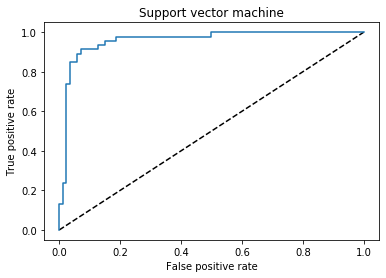

In [146]:
y_pred_prob=svm.predict_proba(x_test)[:,-1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support vector machine')
plt.show()

In [147]:
auc_score=roc_auc_score(y_test,pred)
auc_score

0.8956016177957534

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
random(knn,x,y)

0.8409090909090909 at 54


In [149]:
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 5}

In [150]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
metrics(y_test,pred)

0.8939393939393939
[[82  4]
 [10 36]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        86
           1       0.90      0.78      0.84        46

    accuracy                           0.89       132
   macro avg       0.90      0.87      0.88       132
weighted avg       0.89      0.89      0.89       132



In [151]:
knscores=cross_val_score(knn,x,y,cv=5)
print(knscores)
print(knscores.mean(),knscores.std())

[0.77777778 0.81481481 0.8625     0.79746835 0.81012658]
0.8125375058602906 0.028080482654114027


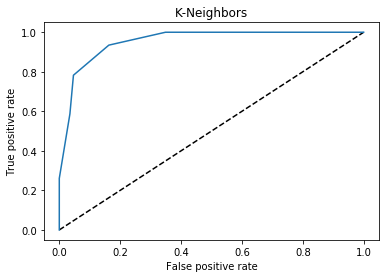

In [152]:
y_pred_prob=knn.predict_proba(x_test)[:,-1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('K-Neighbors')
plt.show()

In [153]:
auc_score=roc_auc_score(y_test,pred)
auc_score

0.8680485338725986

In [154]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [155]:
rf=RandomForestClassifier()
random(rf,x,y)

0.8863636363636364 at 76


In [156]:
parameters={'n_estimators':[10,100,500,1000]}
gd=GridSearchCV(rf,parameters)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.8656716417910447
{'n_estimators': 10}


In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=90)
rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
metrics(y_test,pred)

0.9318181818181818
[[83  5]
 [ 4 40]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        88
           1       0.89      0.91      0.90        44

    accuracy                           0.93       132
   macro avg       0.92      0.93      0.92       132
weighted avg       0.93      0.93      0.93       132



In [158]:
rfscore=cross_val_score(rf,x,y,cv=5)
print(rfscore.mean())
print(rfscore.std())

0.8523245819659321
0.05084806773479893


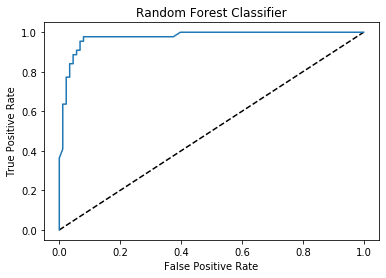

In [159]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [160]:
roc_score=roc_auc_score(y_test,pred)
print(roc_score)

0.9261363636363638


In [161]:
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gbc=GradientBoostingClassifier()
grid=GridSearchCV(gbc, parameters)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [162]:
random(gbc,x,y)

0.8863636363636364 at 88


In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)
gbc=GradientBoostingClassifier(learning_rate=0.001,n_estimators=1000)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
metrics(y_test,pred)

0.8333333333333334
[[77  9]
 [13 33]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        86
           1       0.79      0.72      0.75        46

    accuracy                           0.83       132
   macro avg       0.82      0.81      0.81       132
weighted avg       0.83      0.83      0.83       132



In [164]:
gbcscore=cross_val_score(gbc,x,y,cv=5)
print(gbcscore)
print(gbcscore.mean())
print(gbcscore.std())

[0.75308642 0.92592593 0.9        0.81012658 0.92405063]
0.862637912173777
0.06918350933393906


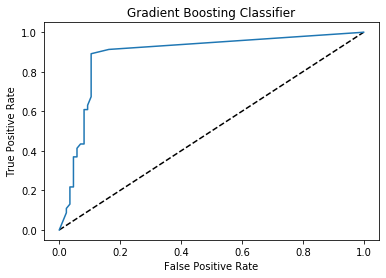

In [165]:
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

In [166]:
roc_score=roc_auc_score(y_test,pred)
print(roc_score)

0.8063700707785643


In [167]:
from sklearn.externals import joblib
joblib.dump(gbc,'SocialnetworkAds.pkl')

['SocialnetworkAds.pkl']